# Movie_Series Database

## Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import io
movies_data = """Movie_ID,Title,Genre,Year,Rating,Votes,Runtime
1,Inception,Sci-Fi,2010,8.8,2000000,148
2,The Dark Knight,Action,2008,9.0,2600000,152
3,Interstellar,Sci-Fi,2014,8.6,1800000,169
4,The Godfather,Crime,1972,9.2,1800000,175
5,Forrest Gump,Drama,1994,8.8,2100000,142
6,Parasite,Thriller,2019,8.6,900000,132
7,Avengers: Endgame,Action,2019,8.4,1200000,181
8,The Matrix,Sci-Fi,1999,8.7,1900000,136
9,Gladiator,Action,2000,8.5,1500000,155
10,The Shawshank Redemption,Drama,1994,9.3,2800000,142
11,The Social Network,Drama,2010,7.7,700000,120
12,Joker,Thriller,2019,8.4,1400000,122
13,The Lion King,Animation,1994,8.5,1100000,88
14,Spirited Away,Animation,2001,8.6,800000,125
15,Avengers: Infinity War,Action,2018,8.4,1200000,149
16,Pulp Fiction,Crime,1994,8.9,2000000,154
17,The Lord of the Rings: The Fellowship of the Ring,Fantasy,2001,8.8,2100000,178
18,Fight Club,Drama,1999,8.8,2200000,139
19,Goodfellas,Crime,1990,8.7,1200000,146
20,Star Wars: Episode V - The Empire Strikes Back,Sci-Fi,1980,8.7,1300000,124
21,The Silence of the Lambs,Thriller,1991,8.6,1500000,118
22,Saving Private Ryan,War,1998,8.6,1400000,169
23,The Green Mile,Drama,1999,8.6,1400000,189
24,Léon: The Professional,Crime,1994,8.5,1200000,110
25,The Departed,Crime,2006,8.5,1400000,151
26,Django Unchained,Western,2012,8.4,1600000,165
27,Whiplash,Drama,2014,8.5,900000,106
28,Back to the Future,Sci-Fi,1985,8.5,1200000,116
29,The Prestige,Thriller,2006,8.5,1400000,130
30,Alien,Sci-Fi,1979,8.4,900000,117
31,The Shining,Horror,1980,8.4,1100000,146
32,Apocalypse Now,War,1979,8.4,700000,147
33,Casablanca,Romance,1942,8.5,600000,102
34,Psycho,Horror,1960,8.5,700000,109
35,City of God,Crime,2002,8.6,800000,130
36,Oldboy,Thriller,2003,8.4,600000,120
37,Amélie,Romance,2001,8.3,700000,122
38,The Exorcist,Horror,1973,8.1,400000,122
39,Toy Story,Animation,1995,8.3,900000,81
40,Finding Nemo,Animation,2003,8.2,1000000,100
41,Up,Animation,2009,8.3,1100000,96
42,The Usual Suspects,Crime,1995,8.5,1100000,106
43,Reservoir Dogs,Crime,1992,8.3,1200000,99
44,Inglourious Basterds,War,2009,8.3,1500000,153
45,The Grand Budapest Hotel,Comedy,2014,8.1,900000,99
46,The Big Lebowski,Comedy,1998,8.1,900000,117
47,Monty Python and the Holy Grail,Comedy,1975,8.2,600000,91
48,The Princess Bride,Romance,1987,8.1,500000,98
49,Eternal Sunshine of the Spotless Mind,Romance,2004,8.3,1100000,108
50,Terminator 2: Judgment Day,Sci-Fi,1991,8.6,1100000,137
51,The Sixth Sense,Thriller,1999,8.2,1000000,107
52,Die Hard,Action,1988,8.2,900000,132
53,Mad Max: Fury Road,Action,2015,8.1,1000000,120
54,The Thing,Horror,1982,8.1,400000,109
55,The Dark Knight Rises,Action,2012,8.4,1800000,164
56,No Country for Old Men,Crime,2007,8.2,1000000,122
"""
series_data ="""Series_ID,Title,Genre,Year,Rating,Votes,Runtime
1,Breaking Bad,Crime,2008,9.5,1900000,50
2,Game of Thrones,Fantasy,2011,9.2,2200000,60
3,Stranger Things,Sci-Fi,2016,8.7,1300000,51
4,Chernobyl,Drama,2019,9.4,700000,60
5,The Crown,Drama,2016,8.6,200000,58
6,The Mandalorian,Sci-Fi,2019,8.7,600000,45
7,Friends,Comedy,1994,8.9,1100000,22
8,Sherlock,Crime,2010,9.1,1100000,90
9,The Office,Comedy,2005,8.9,800000,22
10,Black Mirror,Sci-Fi,2011,8.8,500000,60
11,The Boys,Action,2019,8.7,400000,60
12,House of Cards,Drama,2013,8.7,500000,55
13,The Wire,Crime,2002,9.3,300000,58
14,Westworld,Sci-Fi,2016,8.6,500000,62
15,Daredevil,Action,2015,8.6,400000,54
16,Fargo,Thriller,2014,8.9,400000,53
17,Narcos,Crime,2015,8.8,400000,50
18,True Detective,Crime,2014,8.9,500000,60
19,Fleabag,Comedy,2016,8.7,200000,27
20,Mindhunter,Crime,2017,8.6,200000,50
21,Naruto,Animation,2002,8.3,100000,24
22,One Piece,Animation,1999,8.8,100000,24
23,Attack on Titan,Animation,2013,9.0,500000,24
24,The Big Bang Theory,Comedy,2007,8.2,800000,22
25,Ozark,Crime,2017,8.5,300000,55
26,The Office (UK),Comedy,2001,8.5,100000,30
27,The Boys,Action,2019,8.7,400000,60
28,Money Heist,Crime,2017,8.2,500000,45
29,Lucifer,Fantasy,2016,8.1,300000,45
30,The Simpsons,Animation,1989,8.7,400000,22
31,Avatar: The Last Airbender,Animation,2005,9.3,300000,24
32,Rick and Morty,Animation,2013,9.1,600000,22
33,Demon Slayer: Kimetsu no Yaiba,Animation,2019,8.7,100000,24
34,Death Note,Animation,2006,9.0,300000,23
35,Naruto,Animation,2002,8.3,100000,24
36,One Punch Man,Animation,2015,8.7,300000,24
37,Cowboy Bebop,Animation,1998,8.9,200000,24
38,The Witcher,Fantasy,2019,8.1,500000,60
39,Altered Carbon,Sci-Fi,2018,8.0,200000,50
40,The Queen's Gambit,Drama,2020,8.6,400000,55
41,Peaky Blinders,Crime,2013,8.8,500000,60
42,House,Drama,2004,8.7,400000,44
43,Mr. Robot,Thriller,2015,8.5,400000,49
44,The Handmaid's Tale,Drama,2017,8.4,200000,55"""

movies_df = pd.read_csv(io.StringIO(movies_data))
series_df=pd.read_csv(io.StringIO(series_data))

## Search by title

In [2]:
def millions_formatter(x, pos):
    return f'{x / 1000000:.1f}M'
    
def search_by_title(df, media_type):
    title_input = input(f"Enter the title of the {media_type.lower()}: ").strip().title()
    item_info = df[df['Title'].str.lower() == title_input.lower()]
    
    if item_info.empty:
        print(f"No {media_type.lower()} titled '{title_input}' found.")
    else:
        print(f"\n--- {media_type} Details ---")
        print(item_info[['Title', 'Genre', 'Year', 'Rating', 'Votes', 'Runtime']].to_string(index=False))

## Search by genre

In [3]:
def search_by_genre(df, media_type):
    genre_input = input(f"Enter the genre of the {media_type.lower()}: ").strip().title()
    filtered = df[df['Genre'].str.lower() == genre_input.lower()]    
    if filtered.empty:
        print(f"No {media_type.lower()} of genre '{genre_input}' found.")
    else:
        genre_output = filtered.sort_values(by='Rating', ascending=False).head()
        print(f"\n--- Top 5 {media_type} of genre '{genre_input}' ---")
        genre_output.index = range(1, len(genre_output) + 1)
        print(genre_output[['Title', 'Year', 'Rating']])
        
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x='Title', y='Rating', data=genre_output, palette='crest', hue='Title', legend=False, ax=ax)
        ax.set_title(f'Top 5 {genre_input} {media_type} by Rating')
        ax.set_xlabel(media_type) 
        ax.set_ylabel('Rating')
        ax.set_ylim(0, 10)
        ax.set_yticks(range(0, 11, 1))    
        for index, value in enumerate(genre_output['Rating']):
            ax.text(index, value + 0.1, f'{value:.1f}', ha='center', va='bottom', fontsize=12)   
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Search by year

In [4]:
def search_by_year(df, media_type):
    try:
        year_input = int(input(f"Enter the year to search for {media_type.lower()}: "))
        filtered_by_year = df[df['Year'] == year_input]        
        if filtered_by_year.empty:
            print(f"\nNo {media_type.lower()} found from the year {year_input}.")
        else:
            print(f"\n--- {media_type} from the year {year_input} ---")
            filtered_by_year.index = range(1, len(filtered_by_year) + 1)
            print(filtered_by_year[['Title', 'Genre', 'Rating', 'Votes']])
    except ValueError:
        print("Invalid input. Please enter a valid year (a number).")

## View genre statistics

In [5]:
def view_genre_statistics(df, media_type):
    genre_stats = df.groupby('Genre').agg(Average_Rating=('Rating', 'mean'),Total_Votes=('Votes', 'sum')).reset_index()
    print(f"\n--- {media_type} Genre Statistics ---")
    print(genre_stats.to_string(index=False))
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    # hue='Genre'  to fix future warning
    sns.barplot(x='Genre', y='Average_Rating', data=genre_stats, ax=axes[0], palette='crest', hue='Genre')
    axes[0].set_title(f'Average Rating by Genre ({media_type})')
    axes[0].set_ylabel('Average Rating')
    axes[0].set_xlabel('Genre')
    axes[0].set_ylim(0, 10)
    axes[0].tick_params(axis='x', rotation=45)
    for index, value in enumerate(genre_stats['Average_Rating']):
        axes[0].text(index, value + 0.1, f'{value:.1f}', ha='center', va='bottom', fontsize=12)
    sns.barplot(x='Genre', y='Total_Votes', data=genre_stats, ax=axes[1], palette='flare', hue='Genre')
    axes[1].set_title(f'Total Votes by Genre ({media_type})')
    axes[1].set_ylabel('Total Votes (in Millions)')
    axes[1].set_xlabel('Genre')
    axes[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
    for index, value in enumerate(genre_stats['Total_Votes']):
        label = f'{value / 1000000:.1f}M'
        axes[1].text(index, value + 100000, label, ha='center', va='bottom', fontsize=10)
    axes[1].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

## Menu

In [6]:
def display_main_menu():
    print("\n--- Media Database Main Menu ---")
    print("1. Search Movies")
    print("2. Search Web Series")
    print("3. Exit")
    print("--------------------------------")
def display_operations_menu(media_type):
    print(f"\n--- {media_type} Operations ---")
    print("1. Search by Title")
    print("2. Search by Genre (Top 5)")
    print("3. Search by Year")
    print("4. View Genre Statistics")
    print("5. Go Back to Main Menu")
    print("--------------------------------")

## Main


--- Media Database Main Menu ---
1. Search Movies
2. Search Web Series
3. Exit
--------------------------------


Enter your choice (1-3):  1



--- Movies Operations ---
1. Search by Title
2. Search by Genre (Top 5)
3. Search by Year
4. View Genre Statistics
5. Go Back to Main Menu
--------------------------------


Enter your choice (1-5):  4



--- Movies Genre Statistics ---
    Genre  Average_Rating  Total_Votes
   Action        8.428571     10200000
Animation        8.380000      4900000
   Comedy        8.133333      2400000
    Crime        8.600000     11700000
    Drama        8.616667     10100000
  Fantasy        8.800000      2100000
   Horror        8.275000      2600000
  Romance        8.300000      2900000
   Sci-Fi        8.614286     10200000
 Thriller        8.450000      6800000
      War        8.433333      3600000
  Western        8.400000      1600000


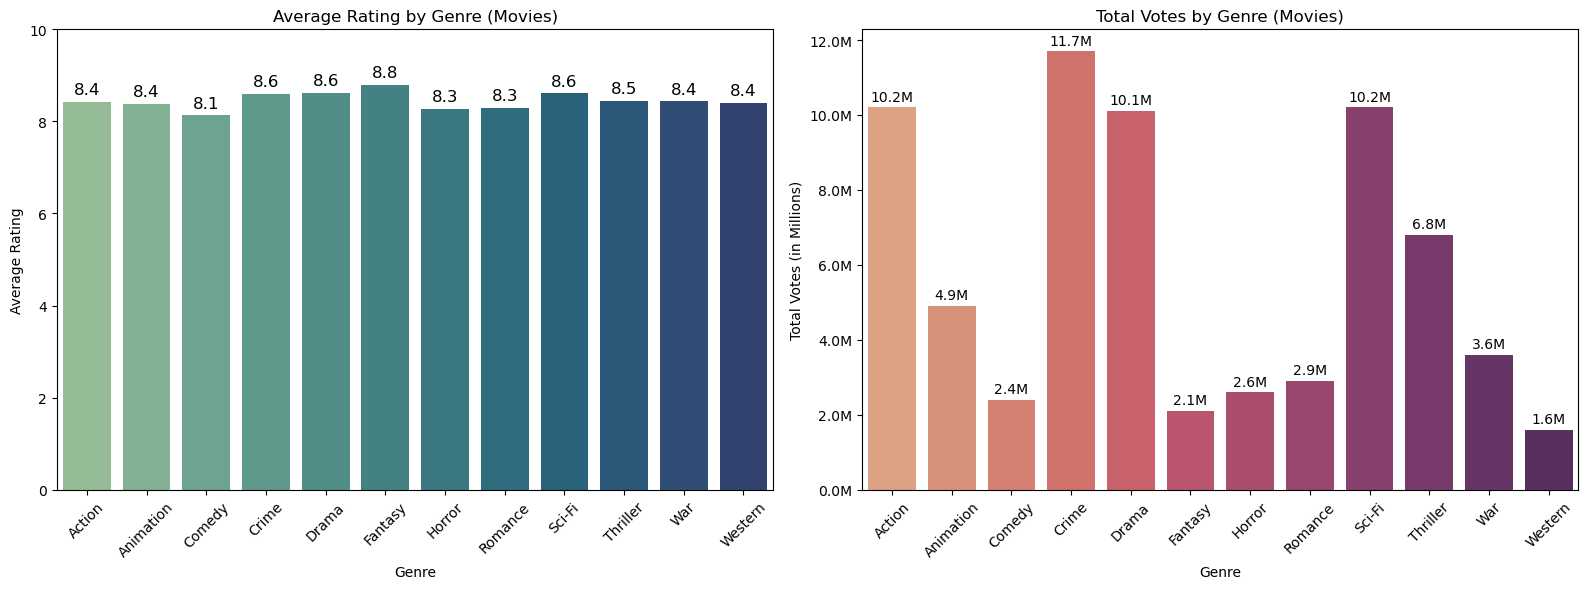


--- Movies Operations ---
1. Search by Title
2. Search by Genre (Top 5)
3. Search by Year
4. View Genre Statistics
5. Go Back to Main Menu
--------------------------------


Enter your choice (1-5):  5



--- Media Database Main Menu ---
1. Search Movies
2. Search Web Series
3. Exit
--------------------------------


Enter your choice (1-3):  2



--- Web Series Operations ---
1. Search by Title
2. Search by Genre (Top 5)
3. Search by Year
4. View Genre Statistics
5. Go Back to Main Menu
--------------------------------


Enter your choice (1-5):  4



--- Web Series Genre Statistics ---
    Genre  Average_Rating  Total_Votes
   Action        8.666667      1200000
Animation        8.800000      3000000
   Comedy        8.640000      3000000
    Crime        8.855556      5700000
    Drama        8.733333      2400000
  Fantasy        8.466667      3000000
   Sci-Fi        8.560000      3100000
 Thriller        8.700000       800000


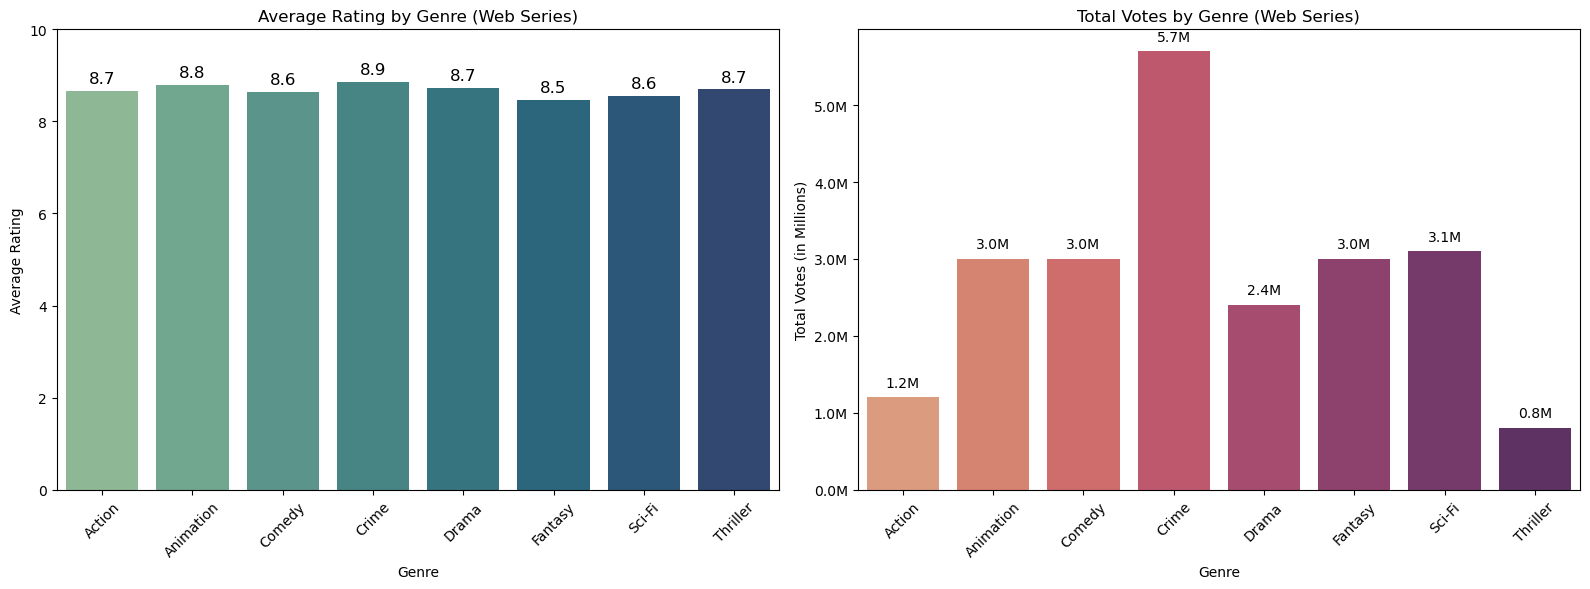


--- Web Series Operations ---
1. Search by Title
2. Search by Genre (Top 5)
3. Search by Year
4. View Genre Statistics
5. Go Back to Main Menu
--------------------------------


Enter your choice (1-5):  5



--- Media Database Main Menu ---
1. Search Movies
2. Search Web Series
3. Exit
--------------------------------


Enter your choice (1-3):  3


Thank you for using the Media Database. Goodbye!


In [9]:
def handle_media_operations(df, media_type):
    while True:
        display_operations_menu(media_type)
        sub_choice = input("Enter your choice (1-5): ")
        if sub_choice == '1':
            search_by_title(df, media_type)
        elif sub_choice == '2':
            search_by_genre(df, media_type)
        elif sub_choice == '3':
            search_by_year(df, media_type)
        elif sub_choice == '4':
            view_genre_statistics(df, media_type)
        elif sub_choice == '5':
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 5.")

def main():
    while True:
        display_main_menu()
        choice = input("Enter your choice (1-3): ")

        if choice == '1':
            handle_media_operations(movies_df, "Movies")
        elif choice == '2':
            handle_media_operations(series_df, "Web Series")
        elif choice == '3':
            print("Thank you for using the Media Database. Goodbye!")
            break
        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

if __name__ == "__main__":
    main()